In [1]:
import numpy as np
import cv2
import dicom
import matplotlib.pyplot as plt

# Reading Dicom data from UCLA_PR folders

Ensure that you have extracted the Zip files before running.

In [2]:
base = '/home/radiation/RadiationTherapyDecisionSupport/data/'
file_folder = 'UCLA_PR_5/'

structureset = dicom.read_file(base + file_folder + 'structureset.dcm')


``structureset`` is a dictionary type object with different fields for each item. It's almost equivalent to ``dicominfo`` in MATLAB. 

Below we print each field of ``structureset`` along with its value:

In [7]:
structureset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20110818'
(0008, 0013) Instance Creation Time              TM: '085607.578000'
(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.4.1742765336.37134.20110328190733
(0008, 0020) Study Date                          DA: '20110328'
(0008, 0030) Study Time                          TM: '085626'
(0008, 0050) Accession Number                    SH: '6835933'
(0008, 0060) Modality                            CS: 'RTSTRUCT'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: 'STEINBERG^MICHAEL^LEE^^M.D.'
(0008, 1010) Station Name                        SH: 'ROMP2VARIANDB'
(0008, 1030) Study Description                   LO: 'Pelvis^01_Prostate (Adult)'
(0008, 103e) Series Description                  LO: 'AR

In [9]:
print(structureset.PatientID)

UCLA_PR_5


In [11]:
print(structureset.dir())

['AccessionNumber', 'ApprovalStatus', 'DeviceSerialNumber', 'EthnicGroup', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OtherPatientIDs', 'PatientBirthDate', 'PatientBirthTime', 'PatientID', 'PatientName', 'PatientSex', 'PhysiciansOfRecord', 'ROIContourSequence', 'RTROIObservationsSequence', 'RefdFrameOfReferenceSequence', 'ReferencedFrameOfReferenceSequence', 'ReferringPhysicianName', 'ReviewDate', 'ReviewTime', 'ReviewerName', 'SOPClassUID', 'SOPInstanceUID', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SoftwareVersions', 'SpecificCharacterSet', 'StationName', 'StructureSetDate', 'StructureSetLabel', 'StructureSetROISequence', 'StructureSetTime', 'StudyDate', 'StudyDescription', 'StudyID', 'StudyInstanceUID', 'StudyTime']


In [16]:
structureset.data_element(structureset.dir()[0]).value

'6835933'

In [17]:
import os

In [22]:
ct_scan = dicom.read_file(base + file_folder + os.listdir(base + file_folder)[0])

In [23]:
print(ct_scan.dir())

['AccessionNumber', 'AcquisitionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'DataCollectionDiameter', 'DeviceSerialNumber', 'DistanceSourceToDetector', 'DistanceSourceToPatient', 'EthnicGroup', 'Exposure', 'ExposureTime', 'FilterType', 'FocalSpots', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'GeneratorPower', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionName', 'KVP', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OtherPatientIDs', 'PatientBirthDate', 'PatientBirthTime', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PhotometricInterpretation', 'PhysiciansOfRecord', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 'ReconstructionDiameter', 'ReferringPhysicianName', 'RescaleIntercept', 'RescaleSlope', 'RotationDirection', 'Rows', 'SOPClassUID', 'SOP

In [25]:
ct_scan.pixel_array
ct_scan.pixel_array.shape

(512, 512)

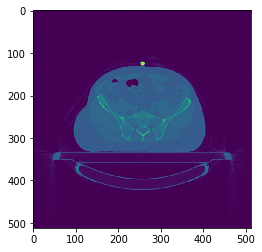

In [28]:
plt.imshow(ct_scan.pixel_array)
plt.show()

In [29]:
dose_data = dicom.read_file(base + file_folder + "dose.dcm")

In [30]:
dose_data.dir()

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'Columns',
 'DVHSequence',
 'DeviceSerialNumber',
 'DoseGridScaling',
 'DoseSummationType',
 'DoseType',
 'DoseUnits',
 'EthnicGroup',
 'FrameIncrementPointer',
 'FrameOfReferenceUID',
 'GridFrameOffsetVector',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfFrames',
 'OtherPatientIDs',
 'PatientBirthDate',
 'PatientBirthTime',
 'PatientID',
 'PatientName',
 'PatientSex',
 'PhotometricInterpretation',
 'PhysiciansOfRecord',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'RefdRTPlanSequence',
 'RefdStructureSetSequence',
 'ReferencedRTPlanSequence',
 'ReferencedStructureSetSequence',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SliceThick

In [33]:
dose_data.pixel_array.shape

(317, 136, 206)

In [37]:
np.max(dose_data.pixel_array[1])

126

In [38]:
dose_data.DoseGridScaling

'4.2841435e-5'